In [2]:

from qiskit import QuantumCircuit
from qiskit import transpile, schedule
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit import pulse, Aer
from qiskit.pulse.library import Gaussian, GaussianSquare, Drag
from qiskit.providers.fake_provider import FakeKolkata
from qiskit.visualization import plot_histogram
from qiskit.circuit import Gate, Parameter
import numpy as np
from qiskit_experiments.library import StateTomography
backend=FakeKolkata()


# combination of PT 

### GHZ with and without PT

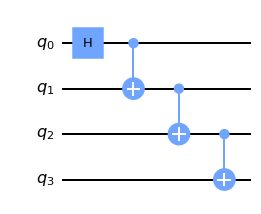

In [3]:
ghz=QuantumCircuit(4)
ghz.h(0)
ghz.cx(0,1)
ghz.cx(1,2)
ghz.cx(2,3)
ghz.draw('mpl')

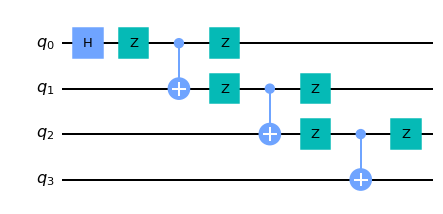

In [4]:
ghz_PT=QuantumCircuit(4)
ghz_PT.h(0)
ghz_PT.z(0)
ghz_PT.cx(0,1)
ghz_PT.z(0)
ghz_PT.z(1)
ghz_PT.cx(1,2)
ghz_PT.z(1)
ghz_PT.z(2)
ghz_PT.cx(2,3)
ghz_PT.z(2)
ghz_PT.draw('mpl')

In [5]:
st=StateTomography(ghz)
stdata=st.run(backend).block_for_results()
state_result=stdata.analysis_results("state")
fid_result=stdata.analysis_results("state_fidelity")
print(f"State Fidelity = {fid_result.value}")

Adding a job from a backend (aer_simulator) that is different than the current backend (fake_kolkata). The new backend will be used, but service is not changed if one already exists.


State Fidelity = 0.9037931328911698


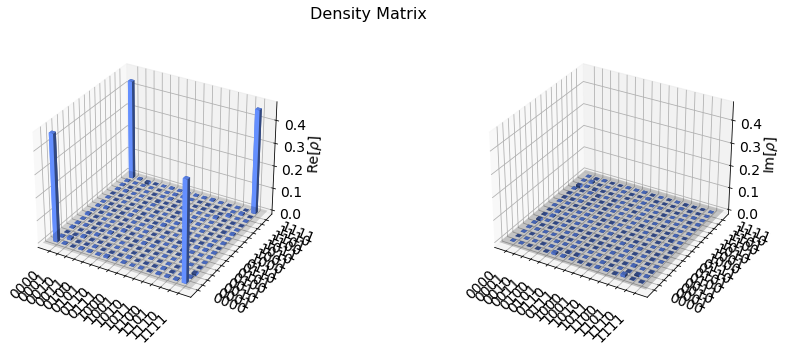

In [6]:
from qiskit.visualization import plot_state_city
plot_state_city(stdata.analysis_results("state").value, title='Density Matrix')

In [7]:
st=StateTomography(ghz_PT)
stdata=st.run(backend).block_for_results()
state_result=stdata.analysis_results("state")
fid_result=stdata.analysis_results("state_fidelity")
print(f"State Fidelity = {fid_result.value}")

Adding a job from a backend (aer_simulator) that is different than the current backend (fake_kolkata). The new backend will be used, but service is not changed if one already exists.


State Fidelity = 0.9083508892564841


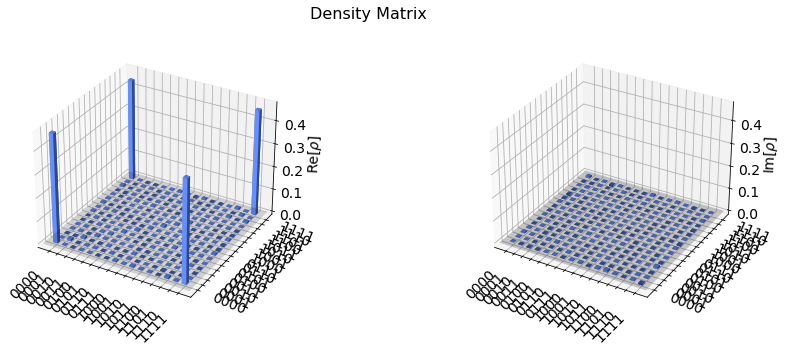

In [8]:
from qiskit.visualization import plot_state_city
plot_state_city(stdata.analysis_results("state").value, title='Density Matrix')

# Pauli twirling

In [4]:

    circ=QuantumCircuit(2)
    circ.h(0)
    circ.z(0)
    circ.z(1)
    circ.cx(0,1)    
    circ.z(1)

0.9414159999999999

In [24]:
circ=QuantumCircuit(2)
circ.h(0)
circ.z(0)
circ.z(1)
circ.cx(0,1)

In [ ]:
st=StateTomography(circ)
stdata=st.run(backend).block_for_results()
state_result=stdata.analysis_results("state")
fid_result=stdata.analysis_results("state_fidelity")
print(f"State Fidelity = {fid_result.value}")

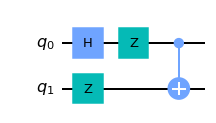

In [25]:
circ.draw(output='mpl')

In [26]:
st=StateTomography(circ)
stdata=st.run(backend).block_for_results()
state_result=stdata.analysis_results("state")
fid_result=stdata.analysis_results("state_fidelity")
print(f"State Fidelity = {fid_result.value}")

Adding a job from a backend (aer_simulator) that is different than the current backend (fake_valencia). The new backend will be used, but service is not changed if one already exists.


State Fidelity = 0.9085981734760638


In [28]:
circ=QuantumCircuit(2)
circ.h(0)
circ.x(0)
circ.x(1)
circ.cx(0,1)

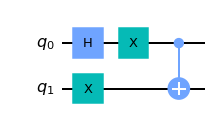

In [29]:
circ.draw('mpl')

In [30]:
st=StateTomography(circ)
stdata=st.run(backend).block_for_results()
state_result=stdata.analysis_results("state")
fid_result=stdata.analysis_results("state_fidelity")
print(f"State Fidelity = {fid_result.value}")

Adding a job from a backend (aer_simulator) that is different than the current backend (fake_valencia). The new backend will be used, but service is not changed if one already exists.


State Fidelity = 0.9018554687499977


In [12]:
f_a=[]
for i in range(50):
    circ=QuantumCircuit(4)
    circ.h(0)
    circ.z(0)
    circ.cx(0,1)
    circ.z(0)
    circ.z(1)
    circ.cx(1,2)
    circ.z(1)
    circ.z(2)
    circ.cx(2,3)
    circ.z(2)
    circ.measure_all()
    job_a=backend.run(circ,shots=20000)
    result_a=job_a.result()
    counts_a = result_a.get_counts(circ)
    f_a.append(counts_a["1111"]/20000+counts_a["0000"]/20000)


import numpy as np
np.mean(f_a)

0.8636319999999997

In [13]:
counts_a

{'1000': 177,
 '0000': 9314,
 '1101': 392,
 '1011': 611,
 '1111': 7992,
 '0011': 58,
 '1010': 35,
 '1110': 446,
 '0111': 366,
 '0101': 24,
 '0100': 219,
 '0110': 24,
 '0001': 229,
 '1100': 23,
 '1001': 25,
 '0010': 65}

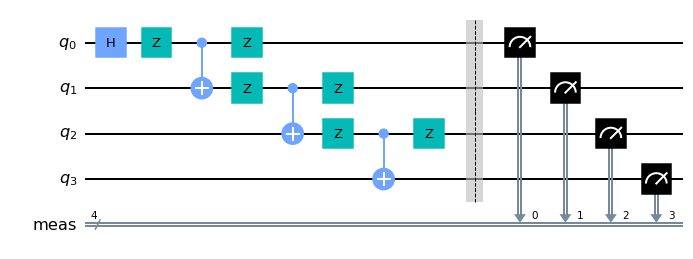

In [7]:
circ.draw(output='mpl')

In [8]:
f_a=[]
for i in range(50):
    circ=QuantumCircuit(4)
    circ.h(0)

    circ.cx(0,1)

    circ.cx(1,2)

    circ.cx(2,3)

    circ.measure_all()
    job_a=backend.run(circ,shots=20000)
    result_a=job_a.result()
    counts_a = result_a.get_counts(circ)
    f_a.append(counts_a["1111"]/20000+counts_a["0000"]/20000)


import numpy as np
np.mean(f_a)

0.8647839999999999

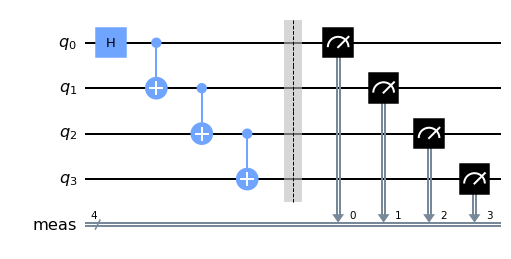

In [9]:
circ.draw('mpl')